# vseshad2
# sspatl10
# pthiagu2

# Task 0




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import seaborn as sns
from multiprocessing.pool import ThreadPool

#Read in data
month1 = pd.read_csv("jul13_decoded", sep='\t')
month2 = pd.read_csv("aug13_decoded", sep='\t')

# merge datasets into df
df = pd.concat([month1, month2])

## Part 1

In [2]:
#Observe times
df['datetime'] = pd.to_datetime(df['Time'], unit='s')
df['datetime'] = df['datetime'].dt.tz_localize('America/Chicago', ambiguous=True)

#Filter to date range wanted
df = df[(1372698000 < df['Time']) & (df['Time'] < 1375376400)]
#Fliter out bad node types
df = df[df['Node Type'] != 'service_not_present']
print("Min Time: ", min(df['datetime']))
print("Max Time: ", max(df['datetime']))

df.head()
df['Complete Node'].value_counts()

Min Time:  2013-07-01 17:00:28-05:00
Max Time:  2013-08-01 16:46:23-05:00


c13-4c0s2n0     7657
c21-5c0s3n0     7593
c0-11c2s3n1     7548
c18-7c1s2n3     7123
c22-8c2s5n0     6775
c16-9c2s2n0     6365
c16-7c0s1n0     4913
c21-0c2s4n0     4143
c22-10c1s3n2    2286
c8-6c2s7n3      1986
c5-4c2s3n3      1981
c12-7c1s5n1     1976
c1-3c2s7n1      1897
c11-0c2s2n3     1659
c6-11c2s0n2     1588
c3-0c2s7n3      1347
c12-2c2s2n3     1310
c3-8c0s4n3      1177
c5-5c1s0n2      1057
c2-8c1s5n0      1025
c7-10c2s1n1     1020
c13-10c2s0n1    1017
c7-11c1s2n1     1001
c21-8c2s1n2      926
c13-9c0s1n0      916
c16-8c1s7n3      909
c12-5c0s6n0      906
c15-8c1s0n0      811
c5-2c2s4n3       762
c10-3c2s5n3      761
                ... 
c22-4c0s0n2        1
c14-9c2s7n0        1
c7-3c2s3n0         1
c22-10c0s7n1       1
c13-2c0s5n0        1
c4-4c0s3n1         1
c13-0c2s3n3        1
c14-10c0s4n1       1
c12-5c2s3n1        1
c18-8c2s5n2        1
c12-3c1s3n3        1
c6-7c0s0n0         1
c16-8c0s3n3        1
c9-10c2s6n0        1
c13-2c0s3n3        1
c13-4c2s5n0        1
c20-10c2s4n2 

In [3]:
# Sliding Window Algorithm:
# sliding(df_node) {
# 	W = window size;
# 	foreach event in the dataframe {
# 		if (T(df_node.curr) - T(df_node.prev) < W)
# 			add df_node.curr to the current tuple;
# 		else
# 			create a new tuple with df_node.curr;
# 	}
# }

#print(len(df['Complete Node'].unique()))
W = 100
def sliding(df_node):
    
    flag = 0
    for idx, row in df[df['Complete Node'] == df_node].iterrows():
        if(flag == 0):
            prev_row = row
            
        curr_time = row['Time']
        prev_time = prev_row['Time']
        
        if (curr_time - prev_time < W):
            df.at[idx,'Clusters'] = 'False'
            if(flag == 0):
                flag = 1
                df.at[idx,'Clusters'] = 'True'
                
        else:
            df.at[idx,'Clusters'] = 'True'
            
        prev_row = row
    return None

    

    

In [4]:

# create a pool with 8 threads (increase or reduce this based on the number of threads your processor supports)
for w in range(0,210, 10):
    df['Clusters'] = 'True'
    global W
    W = w
    pool = ThreadPool(8) 
    poolresults = pool.map(sliding, list(df['Complete Node'].unique())) # map the square function to inputs
    pool.close()
    pool.join()
    print(W)
    print(df['Clusters'].value_counts())


0
True    124742
Name: Clusters, dtype: int64
10
False    71325
True     53417
Name: Clusters, dtype: int64
20
False    79739
True     45003
Name: Clusters, dtype: int64
30
False    82758
True     41984
Name: Clusters, dtype: int64
40
False    86249
True     38493
Name: Clusters, dtype: int64
50
False    87407
True     37335
Name: Clusters, dtype: int64
60
False    88606
True     36136
Name: Clusters, dtype: int64
70
False    89650
True     35092
Name: Clusters, dtype: int64
80
False    92182
True     32560
Name: Clusters, dtype: int64
90
False    92501
True     32241
Name: Clusters, dtype: int64
100
False    92803
True     31939
Name: Clusters, dtype: int64
110
False    93101
True     31641
Name: Clusters, dtype: int64
120
False    93866
True     30876
Name: Clusters, dtype: int64
130
False    94058
True     30684
Name: Clusters, dtype: int64
140
False    94567
True     30175
Name: Clusters, dtype: int64
150
False    94908
True     29834
Name: Clusters, dtype: int64
160
False    98369

Text(0.5,1,'Knee Curve')

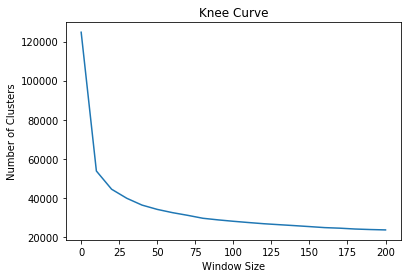

In [5]:
w_vals = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
cluster_vals = [124742, 53763, 44450, 39805, 36327, 34132,32470, 31094, 29591, 28767, 28053, 27409, 26801, 26315, 25839, 25337, 24813, 24523, 24093, 23828, 23636]
plt.plot(w_vals, cluster_vals)
plt.xlabel('Window Size')
plt.ylabel('Number of Clusters')
plt.title('Knee Curve')

In [6]:

df['Clusters'] = 'True'
global W
W = 15
pool = ThreadPool(8) 
poolresults = pool.map(sliding, list(df['Complete Node'].unique())) # map the square function to inputs
pool.close()
pool.join()
print(W)
print(df['Clusters'].value_counts())

df = df[df['Clusters'] == 'True']

15
False    75145
True     49597
Name: Clusters, dtype: int64


## Task 3.3

In [7]:
print(len(df[(df['Node Type'] == 'xe') & (df['Errorcode Type'] == "mem") & (df['Chassis'] == 1)]))
print(len(df[(df['Node Type'] == 'xk') & (df['Errorcode Type'] == "mem") & (df['Chassis'] == 1)]))
print(len(df[(df['Node Type'] == 'service') & (df['Errorcode Type'] == "mem") & (df['Chassis'] == 1)]))

#We can see here the chasis locations are not evenly distributed across the memory errors grouped by node type,
# so they are independent 

2565
257
3


## Below is all Tasks repeated after coalescing

Total Entries:  49597
Unique Nodes:  2653
Number of days:  24
Unique Node Types:  ['xe' 'service' 'xk']
Number of ECC Errors:  35270
MCEs Per Node:
 c21-0c2s4n0     2269
c16-9c2s2n0     1914
c21-5c0s3n0     1531
c0-11c2s3n1     1430
c11-0c2s2n3     1383
c1-3c2s7n1      1155
c5-4c2s3n3      1029
c22-8c2s5n0     1008
c7-10c2s1n1      949
c8-6c2s7n3       844
c18-7c1s2n3      815
c3-0c2s7n3       746
c10-3c2s5n3      731
c13-4c0s2n0      561
c12-7c1s5n1      533
c22-10c1s3n2     527
c7-11c1s2n1      514
c2-8c1s5n0       510
c5-5c1s0n2       472
c12-2c2s2n3      449
c6-11c2s0n3      443
c13-0c2s5n2      440
c3-8c0s4n3       440
c19-9c2s7n0      430
c13-9c0s1n0      427
c15-8c1s0n0      422
c16-11c2s3n3     397
c16-7c0s1n0      396
c19-5c0s2n3      363
c2-1c1s7n2       347
                ... 
c19-10c0s4n1       1
c0-8c2s1n2         1
c10-10c0s1n3       1
c10-4c1s1n1        1
c10-1c2s7n3        1
c18-11c0s5n0       1
c6-3c2s3n2         1
c7-10c1s6n3        1
c9-2c0s4n1         1
c2-7c1s0n1 

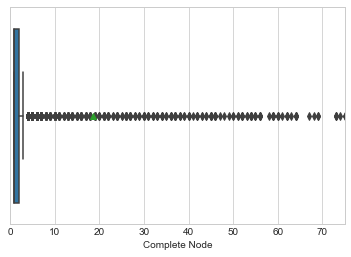

In [8]:
#Length of dataframe
print("Total Entries: ", len(df))

# number of unique nodes
print("Unique Nodes: ", len(df['Complete Node'].unique()))

#Number of days
print("Number of days: ", len(df['datetime'].dt.normalize().unique()))

#Node Types
print("Unique Node Types: ", df['Node Type'].unique())

#Number of ECC errors
print("Number of ECC Errors: ",(df["Error Type"]=="ECC Error").sum())


#MCE per node
print("MCEs Per Node:\n",df['Complete Node'].value_counts())
#Box plot
#boxplot = plt.boxplot(df['Complete Node'].value_counts(), showmeans=True, showbox=True, showfliers=True)
sns.set_style("whitegrid")
ax = sns.boxplot(df['Complete Node'].value_counts(), showmeans=True, showbox=True, showfliers=True)
ax.set(xlim=(0, 75))

#Mean time between MCEs
print("Time Between MCEs:")
for nt in ['service', 'xe', 'xk']:
    timevals = df[df['Node Type'] == nt]['Time'].values
    timevals.sort()
    diffs = timevals[1:] - timevals[:-1]
    print ("Node Type:", nt, "Mean:", diffs.mean(), "STD:", diffs.std())
    


# TASK 1

## Part 1 (may need to rerun to get histogram)

Number of Outliers:  31


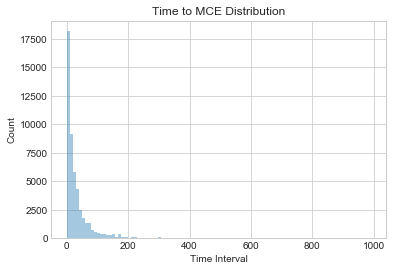

In [9]:
from collections import Counter
from scipy import stats
#Time to MCE Distribution
time_diffs = []
count = 0
#for index, row in df.iterrows():
timevals_new = df['Time'].values
timevals_new.sort()
time_diffs = timevals_new[1:] - timevals_new[:-1]
#print(time_diffs)
key_val = Counter(time_diffs)

lists = sorted(key_val.items())
#print(lists)
#print(len(key_val.keys()))
#key_val
#for key in key_val.keys():
#    print(key)

#print(time_diffs)
#x, y = zip(*lists) # unpack a list of pairs into two tuples
#plt.plot(x,y)
time_diff_ = time_diffs[time_diffs <=1000]
print('Number of Outliers: ', len(time_diffs[time_diffs > 1000]))
ax = sns.distplot(time_diff_, bins=100, kde=False, rug=False)
# ax = sns.boxplot(time_diffs)
# plt.xscale("log")
plt.xlabel('Time Interval')
plt.ylabel('Count')
plt.title("Time to MCE Distribution")
plt.show()

#From observing the graph we can see it fits and exponential distribution

## Part 2

In [10]:
#Percentage of MCEs is due to memory errors
print("Percentage of Memory Errors:", len(df[df["Errorcode Type"]=="mem"]) / len(df["Error Type"])*100)

Percentage of Memory Errors: 28.872714075448116


## Part 3

Total Number of Unique Error Types 146
ECC Error                                                                 35270
Probe Filter Error, Single bit Error, Cache Way - 14, Subcache no - 3      1768
L3 Cache Data Error, Single bit Error, Cache Way - 2, Subcache no - 2      1447
L3 Cache Data Error, Single bit Error, Cache Way - 0, Subcache no - 2      1376
Probe Filter Error, Single bit Error, Cache Way - 12, Subcache no - 3      1089
L3 Cache Data Error, Single bit Error, Cache Way - 5, Subcache no - 3      1050
L3 Cache Data Error, Single bit Error, Cache Way - 9, Subcache no - 0       825
L3 Cache Data Error, Single bit Error, Cache Way - 14, Subcache no - 1      731
L2 Cache Error : VbData : SBC                                               682
Instruction Cache Read Error : IC data load parity                          557
L3 Cache Data Error, Single bit Error, Cache Way - 12, Subcache no - 3      482
Probe Filter Error, Single bit Error, Cache Way - 14, Subcache no - 1       434
L

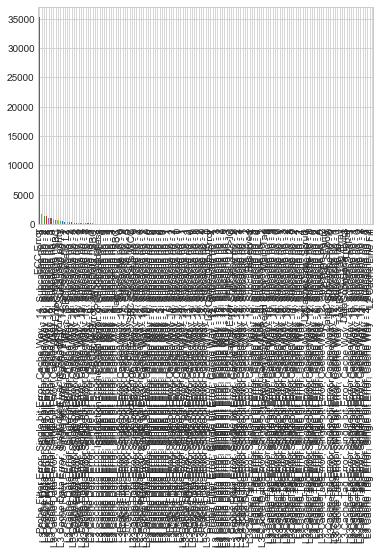

In [11]:
#Types of errors
print("Total Number of Unique Error Types", len((df["Error Type"]).unique()))
print((df["Error Type"]).value_counts())

#MCE per node type
sum = 0
for nt in ['service', 'xe', 'xk']:
    errs = df[df['Node Type'] == nt]['Error Type']
    print ("Node Type:", nt, "Error Types:", len(errs.unique()), "Error Count:", len(errs), "Percentage:", len(errs)/len(df["Error Type"])*100)
    
df["Error Type"].value_counts().plot(kind="bar")

## Part 4

In [12]:
#Uncorrectable error occurs when the value in the UC column is not 0
#UC errors 'cannot be corrected by hardware and may cause loss of data, corruption of processor state, or both'
print("Uncorrectable Errors: ", len(df[df["UC"] != 0]))

#Correctable error occurs when the value in the CECC column is not 0
#No loss of data or corruption of processor state, and corrected by hardware
print("Correctable Errors: ", len(df[df["CECC"] != 0]))

#Deffered error occurs when the value in the DEF column is not 0
#errors not able to be corrected by hardware, no immediate interrupt in program flow, loss of data, or corruption of processor state 
print("Deffered Errors: ", len(df[df["DEF"] != 0]))

Uncorrectable Errors:  2
Correctable Errors:  49582
Deffered Errors:  47749


## Part 5

Uncorrectable Errors:  2


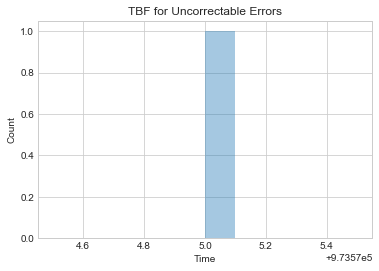

MTBF for Uncorrectable Errors(s):  973575.0
FIT of Uncorrectable Errors 2688172.043010753


In [13]:
from math import pow
print("Uncorrectable Errors: ", len(df[df["UC"] != 0]))
uncorrectable_df = df[df["UC"] != 0]

uncorrectable_timevals = uncorrectable_df['Time'].values
mean_uncorrectable_timevals = uncorrectable_timevals.mean()
uncorrectable_timevals.sort()
#print(uncorrectable_timevals)
uncorrectable_time_diffs = uncorrectable_timevals[1:] - uncorrectable_timevals[:-1]
#print(uncorrectable_time_diffs)
#uncorrectable_df.head()
uncorrectable_dict = Counter(uncorrectable_time_diffs)
uncorrectable_lists = sorted(uncorrectable_dict.items())
#x, y = zip(*uncorrectable_lists) # unpack a list of pairs into two tuples
ax1 = sns.distplot(uncorrectable_time_diffs, bins=10, kde=False, rug=False)
#plt.plot(x,y)
plt.xlabel('Time')
plt.ylabel('Count')
plt.title("TBF for Uncorrectable Errors")
plt.show()
mean_uncorrectable_timevals = uncorrectable_time_diffs.mean()#values are same because there are only to uncorrected errors, which results in 1 tbf 
print("MTBF for Uncorrectable Errors(s): ",mean_uncorrectable_timevals)
print("FIT of Uncorrectable Errors", 2/744*pow(10,9))


# Task 2

In [14]:
# x8 = pd.read_csv('syndrome_x8.txt', sep=" ", header=None)
# x8.columns = ["bitmask", "12", "11", "10", "F", "E", "D", "C", "B", "A", "9", "8", "7", "6", "5", "4", "3", "2", "1", "0"]
# x8.head()
x8 = []
with open('syndrome_x8.txt', 'r') as f:
    lines = f.readlines()

for line in lines:
    line = line.strip()
    row = line.split(" ")
    row.reverse()
    x8.append(row)
print(x8[1])


['9D01', '8901', 'FD01', '6301', 'C601', '2E01', '5C01', 'B801', '019D', '0189', '01FD', '0163', '01C6', '012E', '015C', '01B8', '0101', '0001', '0100', '01']


## Part 1

In [15]:
#Function to calculate number of bit errors

def bit_error_count(syndrome):
    found = -1
    syndrome = str(syndrome)
    if(syndrome.startswith("'")):
        syndrome = syndrome[1:]
    else:
        return -1
    syndrome = int(syndrome, 2)
#     print(hex(syndrome).upper()[2:].zfill(4))
    
    try1 = syndrome & 0xFF
    try2 = (syndrome & 0xFF00)>>8

    if((hex(syndrome).upper()[2:].zfill(4)) in x8[try1]):
        found = bin(try1)
    elif((hex(syndrome).upper()[2:].zfill(4)) in x8[try2]):
        found = bin(try2)
    else:
        return -1
    
    #print(found)
    #print("Bits in error: ", str(found).count("1"))
    return str(found).count("1")








In [16]:
one_bit = 0
two_bit = 0
three_bit = 0
four_bit = 0

for row in df["Syndrome"]:
    count = bit_error_count(row)
    if(count == 1): one_bit += 1
    elif(count == 2): two_bit += 1
    elif(count == 3): three_bit += 1
    elif(count == 4): four_bit += 1

                
df['biterrors'] = df['Syndrome'].apply(lambda x: bit_error_count(x))
print(df['biterrors'].value_counts())

#calculations for part 5
multi_bit_errors = df[df['biterrors']>1]['biterrors']
timevals = df[df['biterrors']>1]['Time'].values
#mean_timevals = uncorrectable_timevals.mean()
timevals.sort()
#print(timevals)
time_diffs = timevals[1:] - timevals[:-1]


tot = (one_bit)+(two_bit)+(three_bit)+(four_bit)
print('One Bit Error %', one_bit/tot*100)
print('Two Bit Error %', two_bit/tot*100)
print('Three Bit Error %', three_bit/tot*100)
print('Four Bit Error %', four_bit/tot*100)

one_bit = 0
two_bit = 0
three_bit = 0
four_bit = 0
for nt in ['service', 'xe', 'xk']:
    print(nt)
    df['biterrors'] = df[df['Node Type'] == nt]['Syndrome'].apply(lambda x: bit_error_count(x))
    print(df['biterrors'].value_counts())
    counts = df['biterrors'].value_counts()
    
    for row in df["biterrors"]:
        if(row == 1): one_bit += 1
        elif(row == 2): two_bit += 1
        elif(row == 3): three_bit += 1
        elif(row == 4): four_bit += 1
    
    tot = (one_bit)+(two_bit)+(three_bit)+(four_bit)
    print('One Bit Error %', one_bit/tot*100)
    print('Two Bit Error %', two_bit/tot*100)
    print('Three Bit Error %', three_bit/tot*100)
    print('Four Bit Error %', four_bit/tot*100)

 1    35374
-1     7051
 3     4267
 5     2127
 2      588
 4      102
 6       53
 0       16
 7       15
 8        4
Name: biterrors, dtype: int64
One Bit Error % 87.70920631772086
Two Bit Error % 1.4579355830502592
Three Bit Error % 10.579950906250774
Four Bit Error % 0.25290719297810615
service
-1.0    1755
 1.0     151
 3.0       8
 5.0       2
Name: biterrors, dtype: int64
One Bit Error % 94.9685534591195
Two Bit Error % 0.0
Three Bit Error % 5.031446540880504
Four Bit Error % 0.0
xe
 1.0    31598
-1.0     5087
 3.0     4175
 5.0     2066
 2.0      540
 4.0       77
 6.0       44
 0.0       14
 7.0       12
 8.0        4
Name: biterrors, dtype: int64
One Bit Error % 86.8669457440696
Two Bit Error % 1.4774686037921694
Three Bit Error % 11.444909573449342
Four Bit Error % 0.2106760786888834
xk
 1.0    3625
-1.0     209
 3.0      84
 5.0      59
 2.0      48
 4.0      25
 6.0       9
 7.0       3
 0.0       2
Name: biterrors, dtype: int64
One Bit Error % 87.70920631772086
Two Bit E

## Part 2

31.0


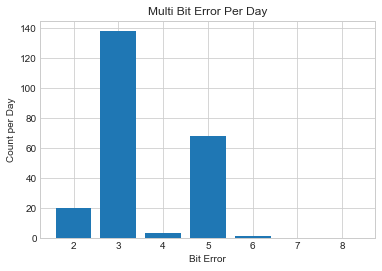

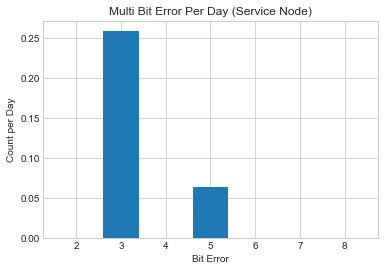

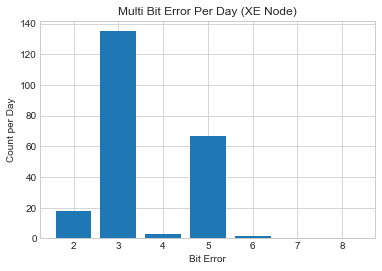

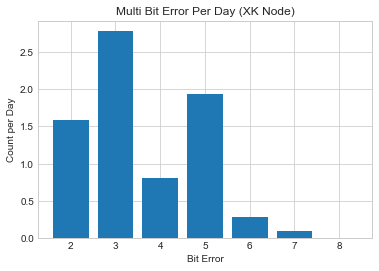

XK node seems to have the most multi bit errors and service seems to have the least


In [17]:
max_time_unix = 1375376400
min_time_unix = 1372698000

time_op_days = max_time_unix-min_time_unix
time_op_days = time_op_days/(3600*24)
print(time_op_days)

bits = ('2', '3', '4', '5', '6', '7', '8')
frequency = ((560+59)/31,(8+4185+86)/31, (78+25)/31, (2121)/31, (53)/31, (15)/31, (4)/31)

plt.bar(bits, frequency)
plt.xlabel("Bit Error")
plt.ylabel("Count per Day")
plt.title("Multi Bit Error Per Day")
plt.show()
service_freq = (0, 8/31, 0, 2/31, 0, 0, 0)
xe_freq = (560/31, 4185/31, 78/31, 2059/31, 44/31, 12/31, 4/31)
xk_freq = (49/31, 86/31, 25/31, 60/31, 9/31, 3/31, 0)

plt.bar(bits, service_freq)
plt.xlabel("Bit Error")
plt.ylabel("Count per Day")
plt.title("Multi Bit Error Per Day (Service Node)")
plt.show()
plt.bar(bits, xe_freq)
plt.xlabel("Bit Error")
plt.ylabel("Count per Day")
plt.title("Multi Bit Error Per Day (XE Node)")
plt.show()
plt.bar(bits, xk_freq)
plt.xlabel("Bit Error")
plt.ylabel("Count per Day")
plt.title("Multi Bit Error Per Day (XK Node)")
plt.show()

print("XK node seems to have the most multi bit errors and service seems to have the least")

## Part 3

In [18]:
from math import sqrt
xe_mem_error = df[(df['Node Type'] == 'xe') & (df['Errorcode Type'] == "mem")]
xk_mem_error = df[(df['Node Type'] == 'xk') & (df['Errorcode Type'] == "mem")]
sum_xe_errors = len((df['Node Type'] == 'xe'))
sum_xk_errors = len((df['Node Type'] == 'xk'))
total_sum = sum_xe_errors + sum_xk_errors
pxe = len(xe_mem_error)/(sum_xe_errors*64)
pxk = len(xk_mem_error)/(sum_xk_errors*32)
print(pxe)
print(pxk) 
# Null Hypothesis :P(Xe) - P(Xk) >= 0
# Alternative Hypothesis :P(Xe) - P(Xk) < 0
# Significance = 0.05
p_val = (len(xe_mem_error) + len(xk_mem_error))/(total_sum)
print("P value:", p_val)

z_val = (pxe-pxk)/sqrt(p_val*(1-p_val)*(1/sum_xe_errors + 1/sum_xk_errors))
print("Z: ", z_val)
print("Critical Value : -1.645")
print("Since our Z value is greater than -1.645, it supports the alternative hypothesis that xk performs worse than xe. So the hypothesis given is true")

0.004269096417122004
0.0002117063532068472
P value: 0.13999838699921366
Z:  1.84140076213484
Critical Value : -1.645
Since our Z value is greater than -1.645, it supports the alternative hypothesis that xk performs worse than xe. So the hypothesis given is true


## Part 4


In [19]:
#multi_error_sum = 12955+11181+1740+350+113+30+4
#print("Total Multi-Bit Errors:", multi_error_sum)
print("This is how many errors that would now become uncorrectable if regular ECC method is used, hence the improved ECC\
      method is far better")

print(len(multi_bit_errors))
#Most data calculated in part 1
print("MTBF(s):", time_diffs.mean())

print('FIT:', len(multi_bit_errors)/744*pow(10,9))

#MTBF value is much less, hence we have more uncorrectable errors per time interval.
#FIT value is much higher than before as we have a ton more uncorrectable errors


df.head()

This is how many errors that would now become uncorrectable if regular ECC method is used, hence the improved ECC      method is far better
7156
MTBF(s): 374.066526904
FIT: 9618279569.892473


,NodeID,Date Time,Complete Node,Cabinet,Chassis,Slot,Node,Node Type,Processor,Time,...,Errorcode,Ext_errorcode,Error Type,Addr,Addr Desc,Errorcode Type,Misc,datetime,Clusters,biterrors
2822,70,2013-07-01 12:00:28,c0-5c1s1n3,0-5,1.0,1.0,3.0,xe,2:600f12,1.372698e+09,...,'100000010011,'1000,ECC Error,2218808c0,Physical,bus,c00a001c01000000,2013-07-01 17:00:28-05:00,True,NaN
2823,70,2013-07-01 12:00:47,c0-5c1s1n3,0-5,1.0,1.0,3.0,xe,2:600f12,1.372698e+09,...,'100000010011,'1000,ECC Error,221880940,Physical,bus,c00a001d01000000,2013-07-01 17:00:47-05:00,True,NaN
2824,70,2013-07-01 12:00:47,c13-9c0s1n0,13-9,0.0,1.0,0.0,xe,2:600f12,1.372698e+09,...,'101000010011,'1000,ECC Error,4f01ddd80,Physical,bus,c00a000d01000000,2013-07-01 17:00:46-05:00,True,NaN
2825,70,2013-07-01 12:01:15,c0-5c1s1n3,0-5,1.0,1.0,3.0,xe,2:600f12,1.372698e+09,...,'100000010011,'1000,ECC Error,221880940,Physical,bus,c00a001e01000000,2013-07-01 17:01:15-05:00,True,NaN
2826,70,2013-07-01 12:02:20,c0-5c1s1n3,0-5,1.0,1.0,3.0,xe,2:600f12,1.372698e+09,...,'100000010011,'1000,ECC Error,2218808c0,Physical,bus,c00a002101000000,2013-07-01 17:02:20-05:00,True,NaN
